# EDA Case Study: Loan Default Risk Analytics

---

## Introduction

This case study aims to give an idea of applying **Exploratory Data Analysis (EDA)** in a real business scenario. We will develop a basic understanding of **risk analytics in banking and financial services** and understand how data is used to minimize the risk of losing money while lending to customers.

## Business Understanding

Loan-providing companies find it hard to give loans to people due to **insufficient or non-existent credit history**. Because of that, some consumers use this as an advantage by becoming a defaulter.

We work for a **consumer finance company** which specializes in lending various types of loans to urban customers. We will use EDA to analyze the patterns present in the data to ensure that applicants capable of repaying the loan are not rejected.

### Two Types of Risk:
| Scenario | Risk |
|---|---|
| Applicant **likely to repay** but loan **not approved** | Loss of business |
| Applicant **likely to default** but loan **approved** | Financial loss |

### Loan Application Outcomes:
- **Approved**: The company approved the loan application
- **Cancelled**: The client cancelled during approval process
- **Refused**: The company rejected the loan
- **Unused offer**: Loan cancelled by client at a different stage

## Business Objectives

This case study aims to **identify patterns** which indicate if a client has difficulty paying their installments. These patterns can be used for:
- Denying the loan
- Reducing the loan amount
- Lending at a higher interest rate for risky applicants

The goal is to find the **driver variables** behind loan default using EDA.

## Data Understanding

This dataset has **3 files**:

| File | Description |
|---|---|
| `application_data.csv` | Client information at the time of application — whether a client has payment difficulties |
| `previous_application.csv` | Client's previous loan data — whether prior application was Approved, Cancelled, Refused, or Unused |
| `columns_description.xlsx` | Data dictionary describing the meaning of all variables |

---
## Step 1: Environment Setup & Library Imports

In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib inline
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

print('Libraries loaded successfully!')

Libraries loaded successfully!


---
## Step 2: Mount Google Drive (Colab Only)

> **Skip this cell** if you are running locally and place the CSV files in your working directory.

In [ ]:
# Uncomment and run if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Update these paths to match where you placed the files in your Drive
APP_DATA_PATH = '/content/drive/MyDrive/application_data.csv'
PREV_DATA_PATH = '/content/drive/MyDrive/previous_application.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## Step 3: Load the Data

In [ ]:
# Load application data
app_df = pd.read_csv(APP_DATA_PATH)
print(f'Application Data Shape: {app_df.shape}')
app_df.head()

Application Data Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,...,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,...,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-431

In [ ]:
# Load previous application data
prev_df = pd.read_csv(PREV_DATA_PATH)
print(f'Previous Application Data Shape: {prev_df.shape}')
prev_df.head()

Previous Application Data Shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


---
## Step 4: Exploratory Data Analysis — Application Data

### 4.1 Basic Info & Data Types

In [ ]:
app_df.info()

In [ ]:
app_df.describe()

### 4.2 Missing Value Analysis

In [ ]:
# Calculate missing value percentages
missing = app_df.isnull().sum()
missing_pct = (missing / len(app_df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

print(f'Total columns with missing values: {len(missing_df)}')
missing_df.head(20)

In [ ]:
# Plot top 20 columns with most missing data
top_missing = missing_df.head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_missing.index, y=top_missing['Missing %'], palette='Reds_r')
plt.xticks(rotation=90)
plt.title('Top 20 Columns by Missing Data (%)', fontsize=14)
plt.ylabel('Missing %')
plt.xlabel('Column')
plt.tight_layout()
plt.show()

### 4.3 Target Variable Analysis — `TARGET`

- `TARGET = 1` → Client with **payment difficulties** (defaulter)
- `TARGET = 0` → All other cases (repaid on time)

Target Distribution:
         Count  Percentage
TARGET                    
0       282686       91.93
1        24825        8.07


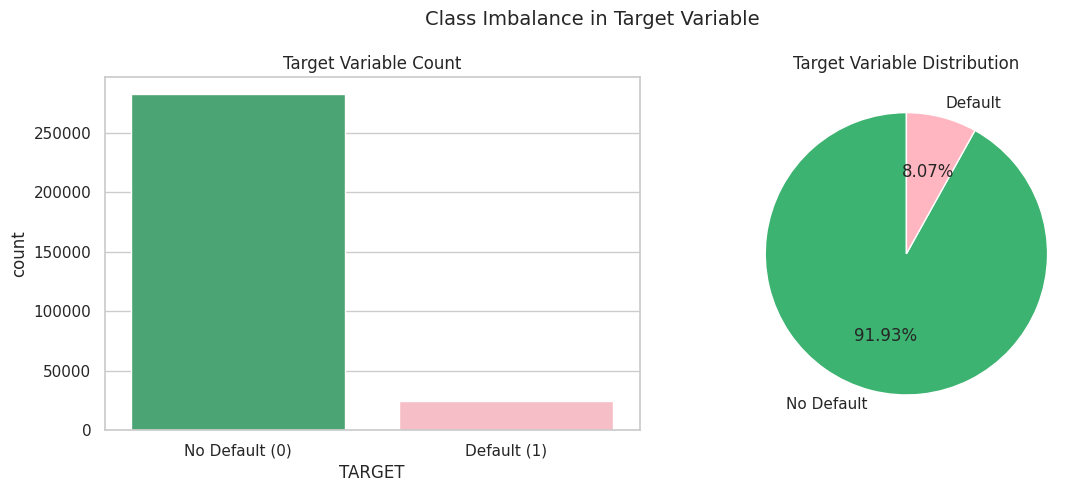

In [ ]:
target_counts = app_df['TARGET'].value_counts()
target_pct = app_df['TARGET'].value_counts(normalize=True) * 100

print('Target Distribution:')
print(pd.DataFrame({'Count': target_counts, 'Percentage': target_pct}))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot (Green & Pink)
sns.countplot(
    x='TARGET',
    data=app_df,
    palette=['mediumseagreen', 'lightpink'],
    ax=axes[0]
)

axes[0].set_title('Target Variable Count')
axes[0].set_xticklabels(['No Default (0)', 'Default (1)'])

# Pie chart (Green & Pink)
axes[1].pie(
    target_counts,
    labels=['No Default', 'Default'],
    autopct='%1.2f%%',
    colors=['mediumseagreen', 'lightpink'],
    startangle=90
)

axes[1].set_title('Target Variable Distribution')

plt.suptitle('Class Imbalance in Target Variable', fontsize=14)
plt.tight_layout()
plt.show()


---
## Step 5: Univariate Analysis

### 5.1 Categorical Variables

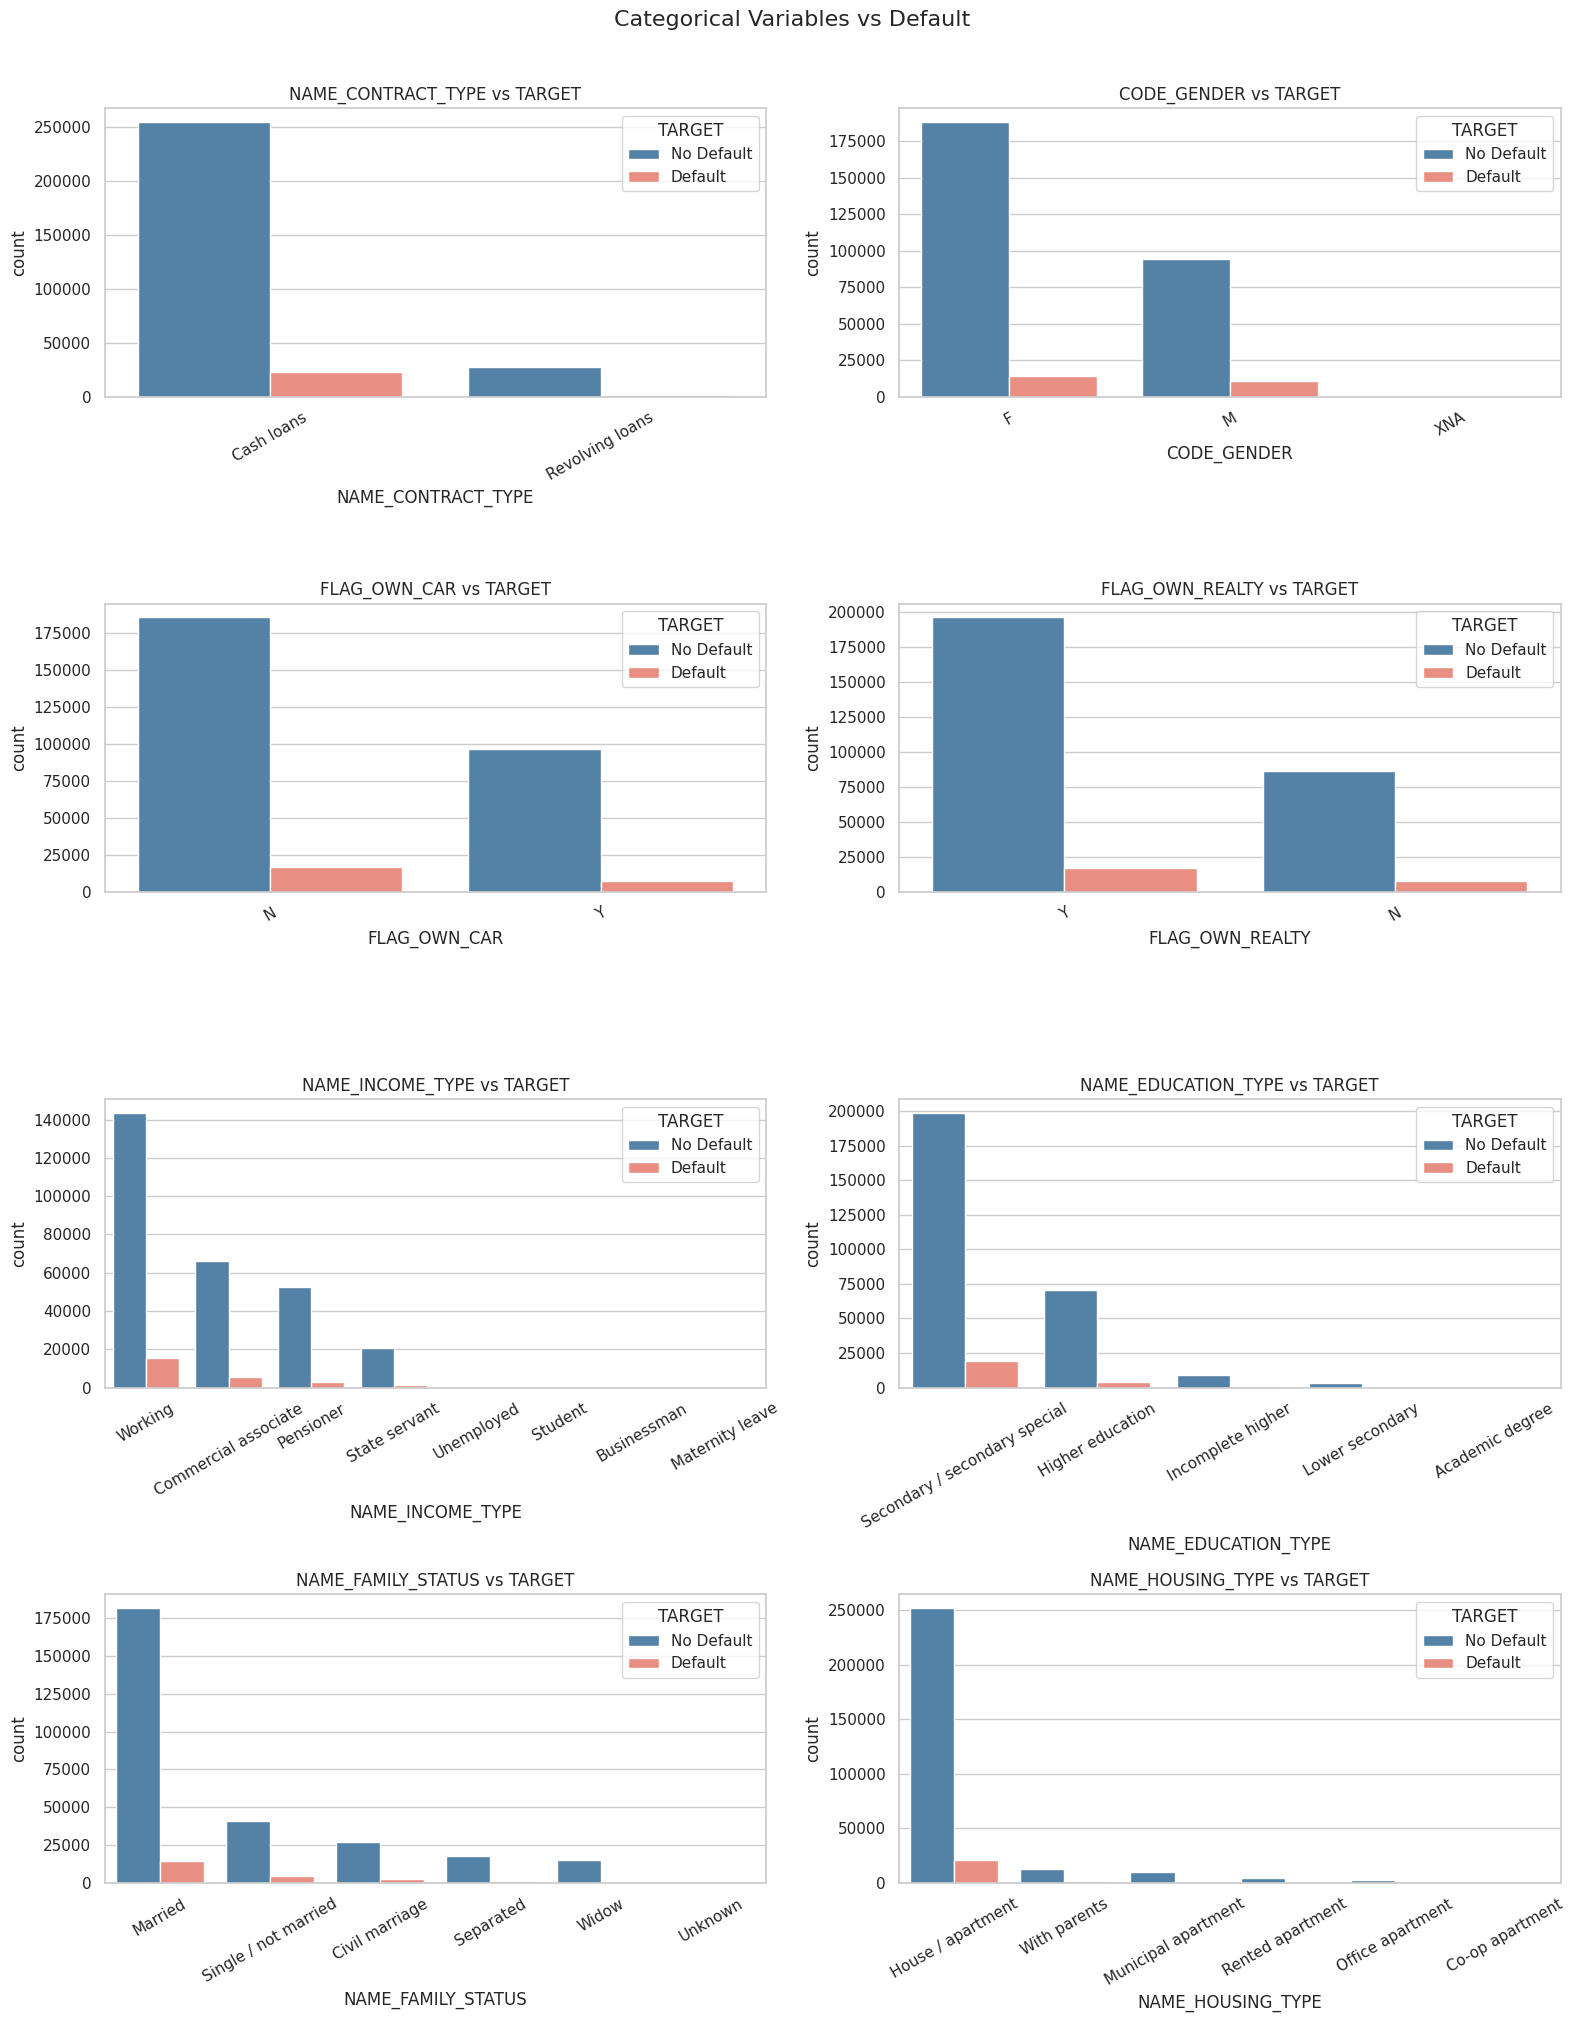

In [ ]:
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = app_df[col].value_counts().index
    sns.countplot(x=col, data=app_df, hue='TARGET', order=order, palette=['steelblue', 'salmon'], ax=axes[i])
    axes[i].set_title(f'{col} vs TARGET')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='TARGET', labels=['No Default', 'Default'])

plt.suptitle('Categorical Variables vs Default', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

### 5.2 Numerical Variables

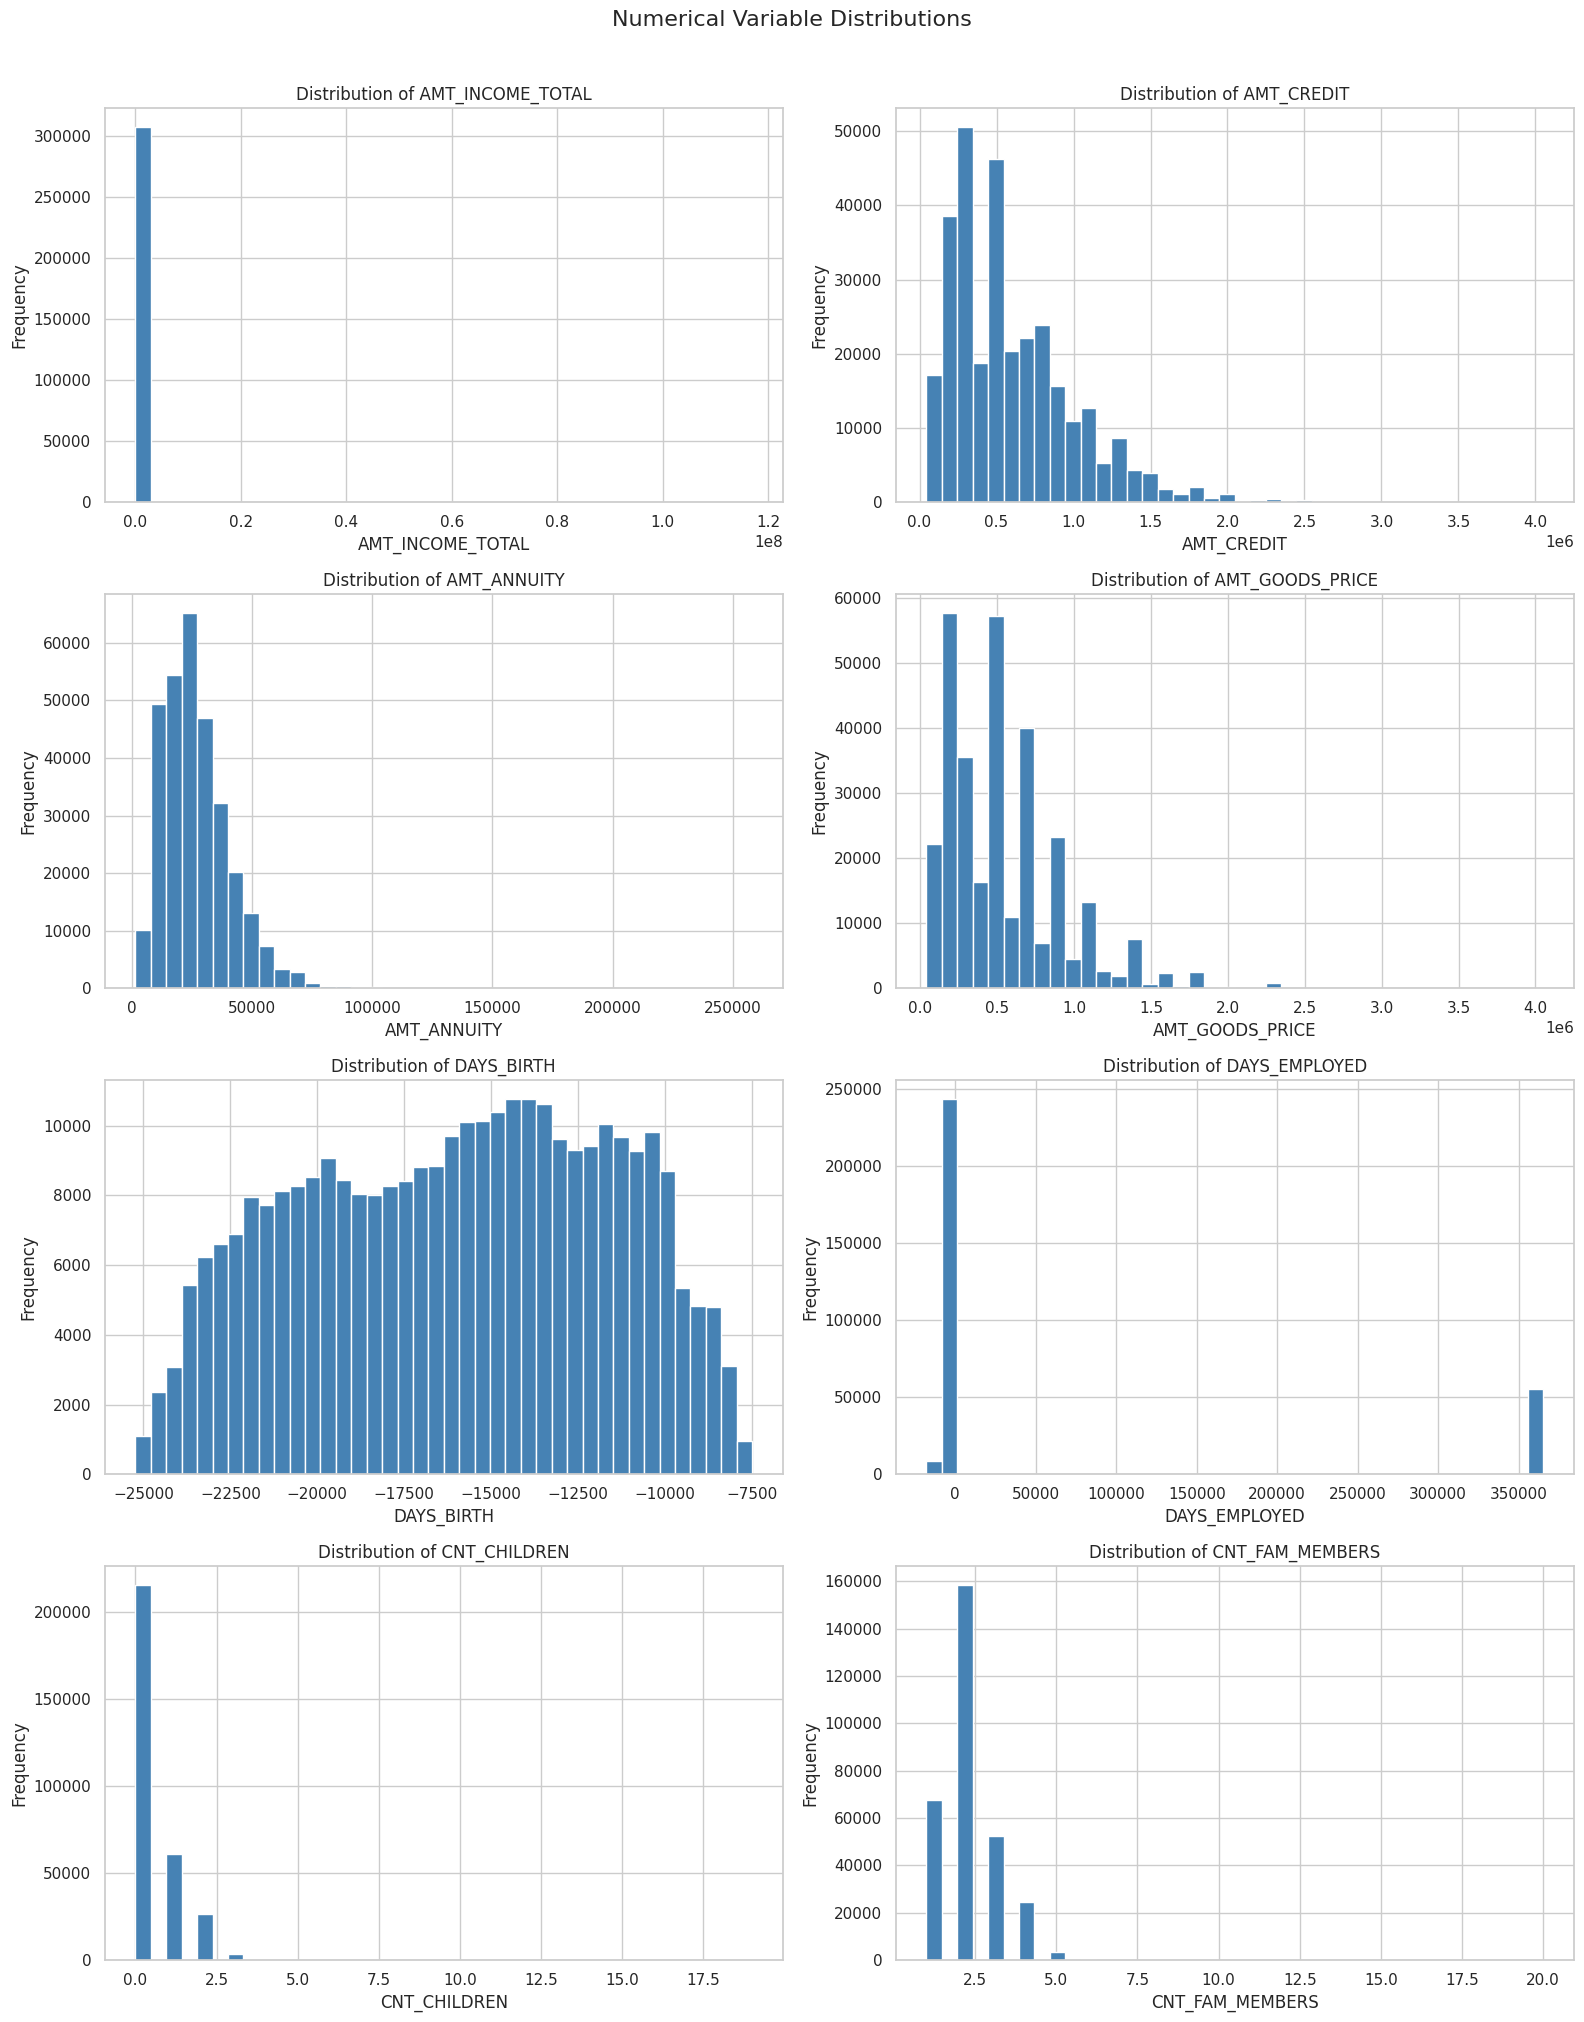

In [ ]:
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Convert DAYS_BIRTH to Age in years
app_df['AGE_YEARS'] = abs(app_df['DAYS_BIRTH']) / 365

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in app_df.columns:
        app_df[col].hist(bins=40, ax=axes[i], color='steelblue', edgecolor='white')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.suptitle('Numerical Variable Distributions', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

---
## Step 6: Bivariate Analysis

### 6.1 Income vs Default

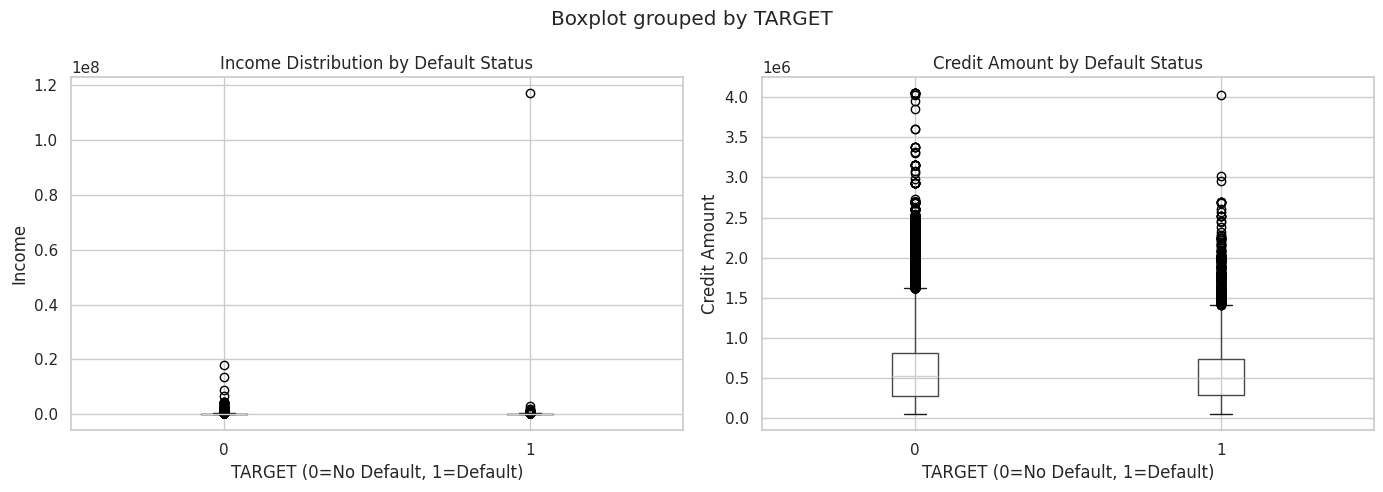

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot: Income by Target
app_df.boxplot(column='AMT_INCOME_TOTAL', by='TARGET', ax=axes[0])
axes[0].set_title('Income Distribution by Default Status')
axes[0].set_xlabel('TARGET (0=No Default, 1=Default)')
axes[0].set_ylabel('Income')

# Box plot: Credit Amount by Target
app_df.boxplot(column='AMT_CREDIT', by='TARGET', ax=axes[1])
axes[1].set_title('Credit Amount by Default Status')
axes[1].set_xlabel('TARGET (0=No Default, 1=Default)')
axes[1].set_ylabel('Credit Amount')

plt.tight_layout()
plt.show()

### 6.2 Age vs Default

In [ ]:
plt.figure(figsize=(12, 5))

# KDE plot of age by target
for target, label, color in [(0, 'No Default', 'steelblue'), (1, 'Default', 'salmon')]:
    subset = app_df[app_df['TARGET'] == target]['AGE_YEARS']
    sns.kdeplot(subset, label=label, color=color, fill=True, alpha=0.4)

plt.title('Age Distribution by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### 6.3 Days birth v.s. Default

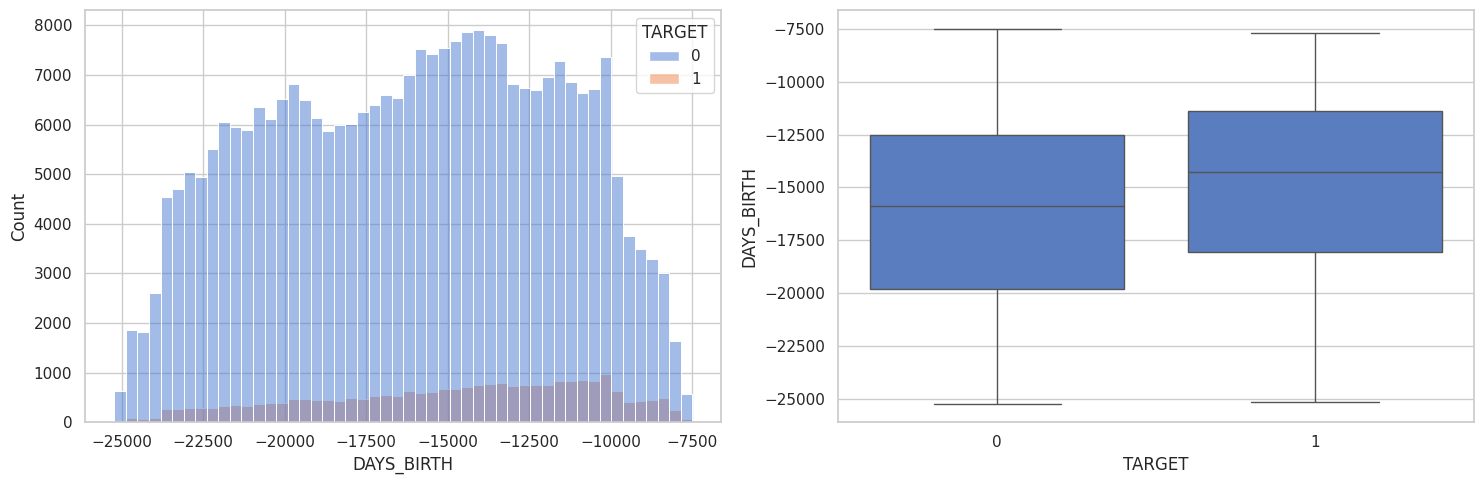

In [ ]:
#relationship of default and days birth
#histgram is unclear due to imbalanced data, boxplot is more clear
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=app_df, x='DAYS_BIRTH', hue='TARGET', bins=50, ax=ax[0])
sns.boxplot(data=app_df, x='TARGET', y='DAYS_BIRTH', ax=ax[1])
plt.tight_layout()
plt.show()


### 6.4 Last phone change v.s. Default by Contract type

In [ ]:
#regardless of contract type, people who change phone more recently have higher default rate
sns.boxplot(
    data=app_df,
    x='TARGET',
    y='DAYS_LAST_PHONE_CHANGE',
    hue='NAME_CONTRACT_TYPE'
)
plt.show()


### 6.4 Total Income v.s. Total Credit Requested by Default

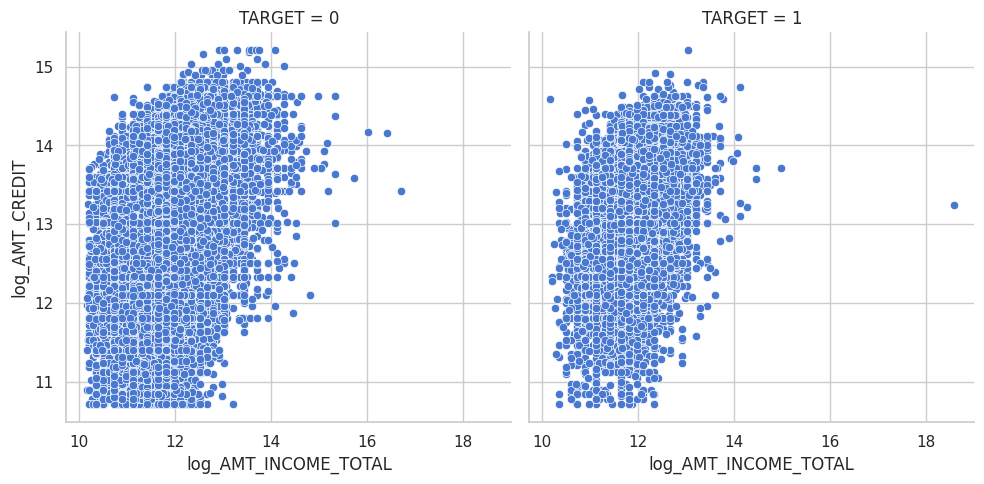

In [ ]:
#relationship of applicant's total income and requested credit amount separated by default
#scatter plot looks relatively similar, which suggests total income and credit amount requested don't seem to have an effect on default rate
app_df['log_AMT_INCOME_TOTAL'] = np.log(app_df['AMT_INCOME_TOTAL'])
app_df['log_AMT_CREDIT'] = np.log(app_df['AMT_CREDIT'])

sns.relplot(
    data = app_df,
    x = 'log_AMT_INCOME_TOTAL',
    y = 'log_AMT_CREDIT',
    col = 'TARGET'
)

---
## Step 7: Correlation Analysis

In [ ]:
# Select numeric columns for correlation
numeric_df = app_df.select_dtypes(include=[np.number])

# Correlation with TARGET
target_corr = numeric_df.corr()['TARGET'].sort_values(ascending=False)
print('Top Positive Correlations with TARGET:')
print(target_corr.head(15))
print('\nTop Negative Correlations with TARGET:')
print(target_corr.tail(15))

In [ ]:
# Heatmap for selected key variables
key_cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'AGE_YEARS', 'CNT_CHILDREN', 'DAYS_EMPLOYED']

key_cols_present = [c for c in key_cols if c in app_df.columns]

plt.figure(figsize=(12, 8))
corr_matrix = app_df[key_cols_present].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, square=True)
plt.title('Correlation Heatmap — Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

---
## Step 8: Previous Application Data Analysis

In [ ]:
print(f'Shape: {prev_df.shape}')
prev_df.head()

In [ ]:
# Distribution of previous application status
plt.figure(figsize=(10, 5))
status_counts = prev_df['NAME_CONTRACT_STATUS'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title('Previous Application Status Distribution')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 8.1 Merge with Application Data

In [ ]:
# Aggregate previous application data per client
prev_agg = prev_df.groupby('SK_ID_CURR').agg(
    total_prev_apps=('SK_ID_PREV', 'count'),
    prev_approved=('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').sum()),
    prev_refused=('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum()),
    prev_cancelled=('NAME_CONTRACT_STATUS', lambda x: (x == 'Canceled').sum()),
    avg_prev_credit=('AMT_CREDIT', 'mean')
).reset_index()

# Merge with application data
merged_df = app_df.merge(prev_agg, on='SK_ID_CURR', how='left')
print(f'Merged data shape: {merged_df.shape}')
merged_df[['SK_ID_CURR', 'TARGET', 'total_prev_apps', 'prev_approved', 'prev_refused']].head(10)

Merged data shape: (307511, 127)


,SK_ID_CURR,TARGET,total_prev_apps,prev_approved,prev_refused
0,100002,1,1.00,1.00,0.00
1,100003,0,3.00,3.00,0.00
2,100004,0,1.00,1.00,0.00
3,100006,0,9.00,5.00,1.00
4,100007,0,6.00,6.00,0.00
5,100008,0,5.00,4.00,0.00
6,100009,0,7.00,7.00,0.00
7,100010,0,1.00,1.00,0.00
8,100011,0,4.00,3.00,1.00
9,100012,0,4.00,3.00,0.00


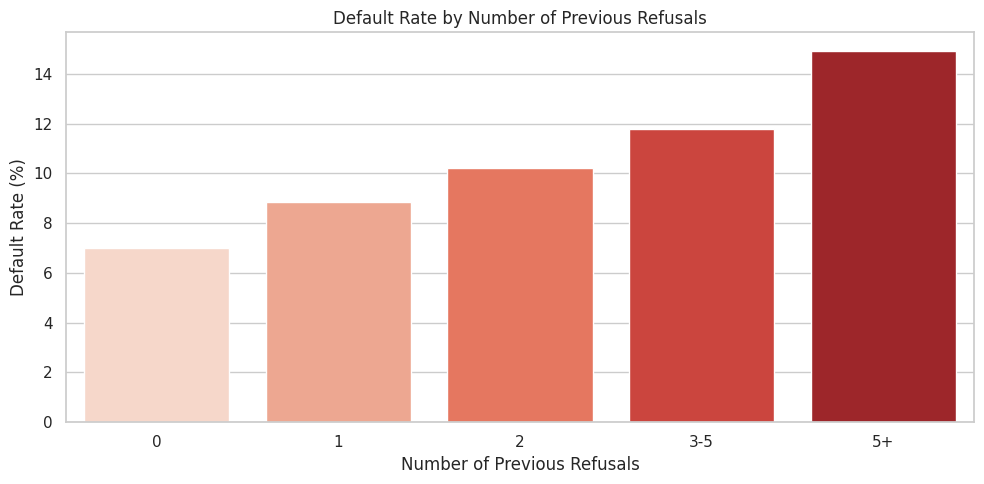

In [ ]:
# Previous refusals vs default rate
plt.figure(figsize=(10, 5))
merged_df['prev_refused_cat'] = pd.cut(merged_df['prev_refused'].fillna(0),
                                        bins=[-1, 0, 1, 2, 5, 100],
                                        labels=['0', '1', '2', '3-5', '5+'])

default_rate = merged_df.groupby('prev_refused_cat')['TARGET'].mean() * 100
sns.barplot(x=default_rate.index, y=default_rate.values, palette='Reds')
plt.title('Default Rate by Number of Previous Refusals')
plt.xlabel('Number of Previous Refusals')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

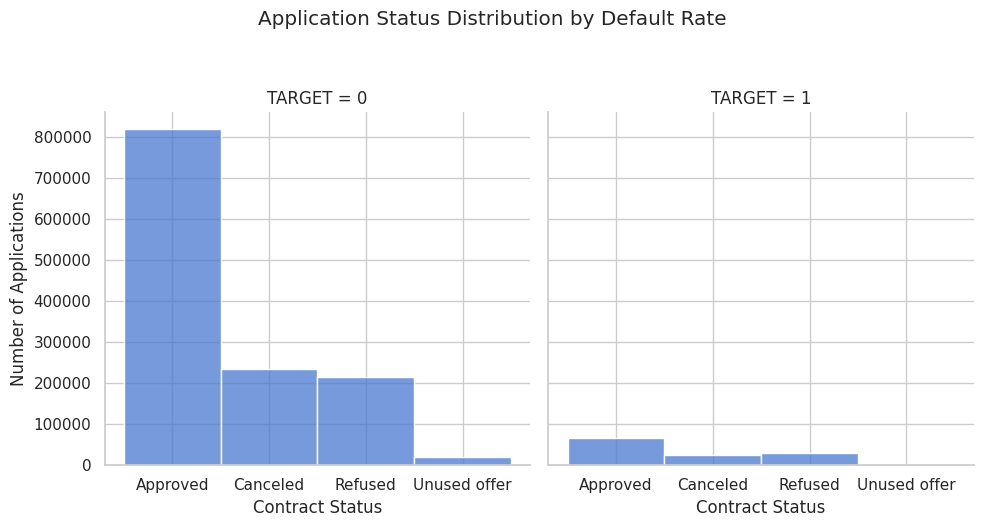

In [ ]:
# Testing reliability of merged data set
plt.figure(figsize=(10, 5))
merged_app_data = pd.merge(app_df, prev_df, on='SK_ID_CURR')
g = sns.displot(data = merged_app_data, x = 'NAME_CONTRACT_STATUS', col = 'TARGET')

g.set_axis_labels("Contract Status", "Number of Applications")
g.set_titles("TARGET = {col_name}")
g.fig.suptitle("Application Status Distribution by Default Rate", y=1.05)

plt.tight_layout()
plt.show()

The current application data only has 307511 entries while the merged dataframe has over 1000000. This means that merging on SK_ID_CURR did not give us a dataset that matches one-to-one. Any IDs that were not in the current application dataset but were in the previous application dataset seem to be automatically given TARGET = 0 even if that loan applicant might have defaulted on their payments. Therefore, the merged dataset is unreliable for analysis.

### 8.2 Boxplots of key features

In [ ]:
#AMT_ANNUITY v.s. contract status, 'refused' have higher mean
condition=(previous['NAME_CONTRACT_STATUS']=='Approved')|(previous['NAME_CONTRACT_STATUS']=='Refused')
previous_new=previous[condition]
sns.boxplot(
    x='NAME_CONTRACT_STATUS',
    y='AMT_ANNUITY',
    data=previous_new
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Previous Annuity by Contract Status')


In [ ]:
# AMT_APPLICATION(How much credit client ask on previous application) v.s. contract status,'refused' have higher mean
sns.boxplot(
    x='NAME_CONTRACT_STATUS',
    y='AMT_APPLICATION',
    data=previous_new
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Application Amount by Contract Status')


In [ ]:
#AMT_GOODS_PRICE(goods price client ask on previous application) v.s. contract status
#'refused' have higher mean, thiner plot compared to previous ones
sns.boxplot(data=previous_new,x='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE')
previous_new.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE'].describe()

### 8.3 Other Important Stats

In [ ]:
# Rejection reasons for the previously rejected loan applicants
conditional_refused = prev_df['NAME_CONTRACT_STATUS'] == 'Refused'
prev_df.loc[conditional_refused]['CODE_REJECT_REASON'].value_counts()

,count
CODE_REJECT_REASON,
HC,175231
LIMIT,55680
SCO,37467
SCOFR,12811
XNA,5236
VERIF,3535
SYSTEM,717
XAP,1


We can see that the majority of reject reasons are attributed to "HC", which likely means High Credit risk. "LIMIT" likely means there was a credit Limit issue. This suggests we should maybe look into variables associated with high credit risk.

---
## Step 9: Key Insights & Conclusions

Based on the EDA conducted above, here are the key findings:

In [ ]:
insights = {
    'Class Imbalance': 'The dataset is heavily imbalanced — only ~8% of applicants are defaulters.',
    'Gender': 'Male clients show a slightly higher default rate than female clients.',
    'Contract Type': 'Cash loans have a higher default rate compared to revolving loans.',
    'Income & Credit': 'Defaulters tend to have lower incomes relative to their credit amounts.',
    'Age': 'Younger applicants tend to default more; older applicants are more reliable.',
    'Employment': 'Unemployed or clients employed for shorter durations show higher default rates.',
    'Previous Refusals': 'Clients with more previous refusals have a higher probability of defaulting.',
    'Education': 'Clients with lower education levels tend to default more frequently.'
}

print('=' * 60)
print('KEY INSIGHTS FROM EDA')
print('=' * 60)
for key, value in insights.items():
    print(f'\n▶ {key}:')
    print(f'  {value}')
print('\n' + '=' * 60)